<a href="https://colab.research.google.com/github/SamuelBrooks115/NMDSI-Project/blob/main/Larger_File_Copy_of_NMDSI_Model_%2B_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import gdown
import pandas as pd
#Full File Address - https://drive.google.com/file/d/15JTBDkJz1chAF6G3gXoMBRY4sRzwDHyH/view?usp=sharing
#file_id - 15JTBDkJz1chAF6G3gXoMBRY4sRzwDHyH


def download_file():
  # Download the saved preprocessed dataset
  file_id = '15JTBDkJz1chAF6G3gXoMBRY4sRzwDHyH'  # File ID
  destination = 'large_processed_dataset.csv'  # File Name

  # Construct the download URL and download the file
  download_url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(download_url, destination, quiet=False)

  #Load the dataset into a pandas DataFrame
  import pandas as pd
  dataset = pd.read_csv(destination)

  return dataset

file_name = 'large_processed_dataset.csv'

download_file()
pro_dataset = pd.read_csv(file_name)

print(pro_dataset.head())


df = pro_dataset
df.dtypes



Downloading...
From (original): https://drive.google.com/uc?id=15JTBDkJz1chAF6G3gXoMBRY4sRzwDHyH
From (redirected): https://drive.google.com/uc?id=15JTBDkJz1chAF6G3gXoMBRY4sRzwDHyH&confirm=t&uuid=298cdac0-7d6f-4d24-ae68-bb8d78a8b6f6
To: /content/large_processed_dataset.csv
100%|██████████| 3.13G/3.13G [00:18<00:00, 172MB/s]


          Timestamp  From Bank  Account  To Bank  Account.1  Amount Received  \
0  2022/09/01 00:17         20   708187       20     720029        -0.002478   
1  2022/09/01 00:02       3196  1486008     3196    1362487        -0.002477   
2  2022/09/01 00:17       1208   260368     1208     265188        -0.002480   
3  2022/09/01 00:03       1208   260369       20     720036         0.026048   
4  2022/09/01 00:02       1208   260369       20     720037         0.015211   

   Receiving Currency  Amount Paid  Payment Currency  Payment Format  \
0                  12    -0.002386                12               5   
1                  12    -0.002386                12               5   
2                  12    -0.002389                12               5   
3                  12     0.037629                12               3   
4                  12     0.022426                12               3   

   Is Laundering  
0              0  
1              0  
2              0  
3         

,0
Timestamp,object
From Bank,int64
Account,int64
To Bank,int64
Account.1,int64
Amount Received,float64
Receiving Currency,int64
Amount Paid,float64
Payment Currency,int64
Payment Format,int64


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix



In [ ]:

from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Timestamp', 'Is Laundering'])
y = df['Is Laundering']

# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine the resampled features and labels back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Is Laundering'] = y_resampled

# Save the resampled DataFrame to CSV for later use or proceed directly to sequence generation
df_resampled.to_csv('resampled_dataset.csv', index=False)

print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())


Original class distribution: Is Laundering
0    31863008
1       35230
Name: count, dtype: int64
Resampled class distribution: Is Laundering
0    35230
1    35230
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd

# Load the resampled dataset
df_resampled = pd.read_csv('resampled_dataset.csv')

# Create sequences for LSTM
sequence_length = 10  # Define sequence length
sequences = []
labels = []

batch_size = 10000  # Adjust batch size as needed
num_batches = (len(df_resampled) - sequence_length + 1) // batch_size + 1
batch_count = 0

for start_idx in range(0, len(df_resampled) - sequence_length + 1, batch_size):
    end_idx = min(start_idx + batch_size, len(df_resampled) - sequence_length + 1)
    for i in range(start_idx, end_idx):
        # Removed 'Timestamp' from drop as it's already not in df_resampled
        sequences.append(df_resampled.iloc[i:i + sequence_length].drop(columns=['Is Laundering']).values)
        labels.append(df_resampled['Is Laundering'].iloc[i + sequence_length - 1])

    batch_count += 1
    print(f"Processed batch {batch_count}/{num_batches}")

sequences = np.array(sequences)
labels = np.array(labels)

print("Sequences shape:", sequences.shape)
print("Labels shape:", labels.shape)

# Save the sequences and labels as NumPy arrays to Google Drive
np.save('/content/drive/My Drive/sequences_med.npy', sequences)
np.save('/content/drive/My Drive/labels_med.npy', labels)



Processed batch 1/8
Processed batch 2/8
Processed batch 3/8
Processed batch 4/8
Processed batch 5/8
Processed batch 6/8
Processed batch 7/8
Processed batch 8/8
Sequences shape: (70451, 10, 9)
Labels shape: (70451,)


In [ ]:
print(sequences.dtype)
print(labels.dtype)


sequences = sequences.astype(np.float32)
labels = labels.astype(np.int8)

# Save the arrays
np.save('/content/drive/My Drive/sequences_med.npy', sequences)
np.save('/content/drive/My Drive/labels_med.npy', labels)

print("Sequences and labels saved to files.")

print(sequences.dtype)
print(labels.dtype)

float64
int64
Sequences and labels saved to files.
float32
int8


In [ ]:
import gdown
import numpy as np

def download_seq():
  #https://drive.google.com/file/d/1-6H_nMXgNUgpfn1GQVUU4lut5FY8siLS/view?usp=sharing
  #1-6H_nMXgNUgpfn1GQVUU4lut5FY8siLS

  # Download the  preprocessed dataset
  file_id = '1-6H_nMXgNUgpfn1GQVUU4lut5FY8siLS'  # File ID
  destination = 'sequences_med.npy'  # File Name


  # Construct the download URL and download the file
  download_url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(download_url, destination, quiet=False)

  #Load the dataset into a numpy array
  sequences = np.load(destination)

  return sequences

def download_label():
  #https://drive.google.com/file/d/1-AZL0rRoMG323EclTLLuK0g3fOgVC-14/view?usp=sharing
  #1-AZL0rRoMG323EclTLLuK0g3fOgVC-14


  # Download the  preprocessed dataset
  file_id = '1-AZL0rRoMG323EclTLLuK0g3fOgVC-14'  # File ID
  destination = 'labels_med.npy'  # File Name


  # Construct the download URL and download the file
  download_url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(download_url, destination, quiet=False)

  #Load the dataset into a numpy array
  import numpy as np
  labels = np.load(destination)

  return labels


sequences = download_seq()
labels = download_label()

sequences = np.array(sequences)
labels = np.array(labels)

print(sequences.shape)
print(labels)
print (sequences.dtype)
print (labels.dtype)

Downloading...
From: https://drive.google.com/uc?id=1-6H_nMXgNUgpfn1GQVUU4lut5FY8siLS
To: /content/sequences_med.npy
100%|██████████| 25.4M/25.4M [00:00<00:00, 31.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-AZL0rRoMG323EclTLLuK0g3fOgVC-14
To: /content/labels_med.npy
100%|██████████| 70.6k/70.6k [00:00<00:00, 55.3MB/s]

(70451, 10, 9)
[0 0 0 ... 1 1 1]
float32
int8


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,dropout_prob = 0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_prob) #Tweak as needed

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])  # Take the output of the last time step -> Apply Dropout
        out = self.fc(out)
        return torch.sigmoid(out)

class TransactionDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)


In [ ]:
# Create Dataset and DataLoader
dataset = TransactionDataset(sequences, labels)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Epoch 10/50, Average Loss: 0.5969
Epoch 20/50, Average Loss: 0.5929
Epoch 30/50, Average Loss: 0.5898
Epoch 40/50, Average Loss: 0.5874
Epoch 50/50, Average Loss: 0.5890


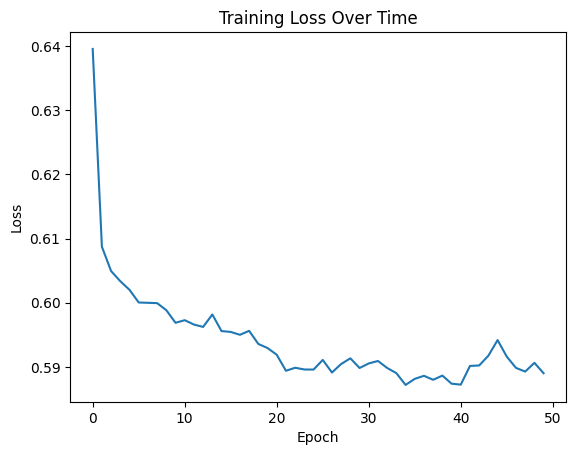

In [ ]:
# Define model parameters
input_dim = sequences.shape[2]
hidden_dim = 128
num_layers = 3
output_dim = 1
dropout_prob = 0.5

# Instantiate the model
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim,dropout_prob)
model.to(model.device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy loss with logits
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay = 1e-4)

# Apply weight initialization
def weights_init(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

model.apply(weights_init)

# Training loop
def train(model, train_loader, criterion, optimizer, num_epochs=50):
    model.train()
    loss_history = []
    for epoch in range(num_epochs):
        total_loss = 0
        for sequences, labels in train_loader:
            sequences, labels = sequences.to(model.device), labels.to(model.device).unsqueeze(1)
            optimizer.zero_grad()
            output = model(sequences)

            loss = criterion(output, labels)
            loss.backward()

            # Gradient clipping
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)
        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
          print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")


    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.show()


# Train the model
train(model, train_loader, criterion, optimizer)


In [ ]:
# Evaluation function
def evaluate(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for sequences, labels in data_loader:
            sequences, labels = sequences.to(model.device), labels.to(model.device).unsqueeze(1).float()
            output = model(sequences)
            loss = criterion(output, labels)
            total_loss += loss.item()

            predicted = (output > 0.3).float()  #Tweaked from 0.5 to minimize false negatives
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = correct_predictions / total_predictions
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    cm = confusion_matrix(all_labels, all_predictions)

    return total_loss / len(data_loader), accuracy, precision, recall, f1, cm

# Evaluate the model
eval_loss, eval_accuracy, eval_precision, eval_recall, eval_f1, eval_cm = evaluate(model, test_loader, criterion)

# Print performance metrics
print(f"Evaluation Loss: {eval_loss:.4f}, Accuracy: {eval_accuracy:.4f}")
print(f"Precision: {eval_precision:.4f}, Recall: {eval_recall:.4f}, F1 Score: {eval_f1:.4f}")

# Print confusion matrix as a table
confusion_matrix_df = pd.DataFrame(eval_cm,
                                   index=['Actual Positive', 'Actual Negative'],
                                   columns=['Predicted Positive', 'Predicted Negative'])
print("\nConfusion Matrix:")
print(confusion_matrix_df)


Evaluation Loss: 0.5911, Accuracy: 0.8092
Precision: 0.8594, Recall: 0.7356, F1 Score: 0.7927

Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                6260                 841
Actual Negative                1848                5142


In [ ]:
model_save_name = 'NMDSI_Model.pt'
path = f"/content/drive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/drive/My Drive/{model_save_name}"
model.load_state_dict(torch.load(path))

<All keys matched successfully>